<a href="https://colab.research.google.com/github/ScoriaX/ada-proyectofinal/blob/main/ada_proyectofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ALUMNOS**
- Piero Fabricio Poblete Andía
- Miguel Andres Flavio Ocharan Coaquira

INSTALAR BIBLIOTECAS

In [ ]:
!pip install igraph

In [ ]:
!pip install cartopy

IMPORTAR BIBLIOTECAS

In [ ]:
import pandas as pd
import networkx as nx
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import igraph
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from google.colab import drive
from collections import Counter

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# FUNCIONES

FUNCIÓN PARA GEOLOCALIZAR

In [ ]:
geolocator = Nominatim(user_agent="mi_app_usuario")
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def obtener_pais(lat, lon):
    try:
        location = geocode((lat, lon))
        if location and 'country' in location.raw['address']:
            return location.raw['address']['country']
        else:
            return None
    except:
        return None

FUNCIÓN PARA GRAFICAR MAPA MUNDIAL

In [ ]:
def graficar_mapa_mundial(latitudes, longitudes):

    fig = plt.figure(figsize=(15, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.stock_img()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels=True)

    ax.scatter(longitudes, latitudes, color='blue', s=30, alpha=0.5, transform=ccrs.PlateCarree(), label='Usuarios')

    plt.title("Mapa Mundial")
    plt.legend(loc="upper right")
    plt.show()

# CARGA DE DATOS

In [ ]:
warnings.filterwarnings("ignore")

amigos_df

In [ ]:
with open('/content/drive/MyDrive/ada_proyectofinal_data/10_million_user.txt', 'r') as f:
    lineas = [line.strip() for line in f]
amigos_df = pd.DataFrame({'usuario_amigos': lineas})

In [ ]:
amigos_df['n_amigos'] = amigos_df['usuario_amigos'].apply(
    lambda x: len(x.replace(',', ' ').split())
)

ubicaciones

In [ ]:
ubicaciones = pd.read_csv('/content/drive/MyDrive/ada_proyectofinal_data/10_million_location.txt', header=None, names=['lat', 'long'])

seguidores

In [ ]:
contador = Counter()
with open('/content/drive/MyDrive/ada_proyectofinal_data/10_million_user.txt') as f:
    for linea in f:
        amigos = linea.strip().split(',')
        contador.update(amigos)

n = 10_000_000
seguidores_df = pd.DataFrame({
    'id_usuario': range(n),
    'n_seguidores': [contador.get(str(i), 0) for i in range(n)]
})
seguidores_df.set_index('id_usuario', inplace=True)

usuarios

In [ ]:
usuarios = pd.concat([amigos_df, ubicaciones, seguidores_df], axis=1)
usuarios = usuarios[['lat', 'long', 'n_amigos', 'n_seguidores']]

# **EDA - ANÁLISIS EXPLORATORIO DE DATOS**

## 1.   USUARIOS - **amigos_df**



### INFO

In [ ]:
print(amigos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   usuario_amigos  object
 1   n_amigos        int64 
dtypes: int64(1), object(1)
memory usage: 152.6+ MB
None


### DESCRIPCIÓN

In [ ]:
print(amigos_df.describe())

           n_amigos
count  1.000000e+07
mean   1.694882e+01
std    1.785663e+02
min    1.000000e+00
25%    1.000000e+00
50%    2.000000e+00
75%    4.000000e+00
max    1.818700e+04


### NÚMERO DE DUPLICADOS

In [ ]:
print(amigos_df.duplicated().sum())

5302440


### NÚMERO DE NULOS

In [ ]:
print(amigos_df.isnull().sum())

usuario_amigos    0
n_amigos          0
dtype: int64


### NÚMERO DE **NO** NULOS

In [ ]:
print(amigos_df.notnull().sum())

usuario_amigos    10000000
n_amigos          10000000
dtype: int64


### ¿COLUMNAS LLENAS?

In [ ]:
print(amigos_df.any())

usuario_amigos    True
n_amigos          True
dtype: bool


### HEAD - TAIL

In [ ]:
print(amigos_df.head())

                                      usuario_amigos  n_amigos
0  2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 7, 389, 223, 1...      2130
1  1, 27188, 50986, 35110, 97740, 105018, 106958,...      1776
2  1, 34590, 13474, 4351, 71253, 97885, 3576, 462...      2618
3  1, 22042, 28492, 13428, 7558, 335637, 66981, 3...      1544
4  1, 18216, 4351, 127455, 2797, 222420, 6672, 30...      1690


In [ ]:
print(amigos_df.tail())

        usuario_amigos  n_amigos
9999995         528114         1
9999996         528114         1
9999997         528114         1
9999998         528114         1
9999999         528114         1


## 2. USUARIOS - **ubicaciones**

### INFO

In [ ]:
print(ubicaciones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   lat     float64
 1   long    float64
dtypes: float64(2)
memory usage: 152.6 MB
None


### DESCRIPCIÓN

In [ ]:
print(ubicaciones.describe())

                lat          long
count  1.000000e+07  1.000000e+07
mean   3.283388e+01 -4.525158e+01
std    1.843706e+01  7.643149e+01
min   -8.399930e+01 -1.769994e+02
25%    3.121595e+01 -9.648351e+01
50%    3.787466e+01 -8.055096e+01
75%    4.199370e+01  1.193162e+00
max    7.299885e+01  1.779993e+02


### NÚMERO DE DUPLICADOS

In [ ]:
print(ubicaciones.duplicated().sum())

0


### NÚMERO DE NULOS

In [ ]:
print(ubicaciones.isnull().sum())

lat     0
long    0
dtype: int64


### NÚMERO DE **NO** NULOS

In [ ]:
print(ubicaciones.notnull().sum())

lat     10000000
long    10000000
dtype: int64


### ¿COLUMNAS LLENAS?

In [ ]:
print(ubicaciones.any())

lat     True
long    True
dtype: bool


### HEAD - TAIL

In [ ]:
print(ubicaciones.head())

         lat        long
0 -83.168664  134.850670
1 -83.290624  134.341523
2 -83.169196  134.229867
3 -83.548065  134.995517
4 -83.220744  134.659429


In [ ]:
print(ubicaciones.tail())

               lat        long
9999995  72.617514 -155.780512
9999996  72.335848 -155.136039
9999997  72.480058 -155.508417
9999998  72.727829 -155.185853
9999999  72.315099 -155.175995


## 3. USUARIOS - **usuarios**

### INFO

In [ ]:
print(usuarios.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   lat           float64
 1   long          float64
 2   n_amigos      int64  
 3   n_seguidores  int64  
dtypes: float64(2), int64(2)
memory usage: 305.2 MB
None


### DESCRIPCIÓN

In [ ]:
print(usuarios.describe())

                lat          long      n_amigos  n_seguidores
count  1.000000e+07  1.000000e+07  1.000000e+07  1.000000e+07
mean   3.283388e+01 -4.525158e+01  1.694882e+01  1.000000e+00
std    1.843706e+01  7.643149e+01  1.785663e+02  2.892248e+01
min   -8.399930e+01 -1.769994e+02  1.000000e+00  0.000000e+00
25%    3.121595e+01 -9.648351e+01  1.000000e+00  0.000000e+00
50%    3.787466e+01 -8.055096e+01  2.000000e+00  0.000000e+00
75%    4.199370e+01  1.193162e+00  4.000000e+00  0.000000e+00
max    7.299885e+01  1.779993e+02  1.818700e+04  5.217000e+03


### NÚMERO DE DUPLICADOS

In [ ]:
print(usuarios.duplicated().sum())

0


### NÚMERO DE NULOS

In [ ]:
print(usuarios.isnull().sum())

lat             0
long            0
n_amigos        0
n_seguidores    0
dtype: int64


### NÚMERO DE **NO** NULOS

In [ ]:
print(usuarios.notnull().sum())

lat             10000000
long            10000000
n_amigos        10000000
n_seguidores    10000000
dtype: int64


### ¿COLUMNAS LLENAS?

In [ ]:
print(usuarios.any())

lat             True
long            True
n_amigos        True
n_seguidores    True
dtype: bool


### HEAD - TAIL

In [ ]:
print(usuarios.head())

         lat        long  n_amigos  n_seguidores
0 -83.168664  134.850670      2130             0
1 -83.290624  134.341523      1776            10
2 -83.169196  134.229867      2618           674
3 -83.548065  134.995517      1544           394
4 -83.220744  134.659429      1690           252


In [ ]:
print(usuarios.tail())

               lat        long  n_amigos  n_seguidores
9999995  72.617514 -155.780512         1             0
9999996  72.335848 -155.136039         1             0
9999997  72.480058 -155.508417         1             0
9999998  72.727829 -155.185853         1             0
9999999  72.315099 -155.175995         1             0


# DETECCIÓN DE OUTLINERS

In [ ]:
outliers_ami = (amigos_df['n_amigos'] < 0)
outliers_ubi = ~((ubicaciones['lat'].between(-90, 90)) & (ubicaciones['long'].between(-180, 180)))

## OUTLINERS EN: **amigos_df**

In [ ]:
print(f"Número de outliers (amigos): {outliers_ami.sum()}")

Número de outliers (amigos): 0


## OUTLINERS EN: **ubicaciones**

In [ ]:
print(f"Número de outliers (ubicaciones): {outliers_ubi.sum()}")

Número de outliers (ubicaciones): 0


# COMPRENSIÓN DE VARIABLES CLAVE

## EN: **amigos_df**

In [ ]:
print(amigos_df.describe())

           n_amigos
count  1.000000e+07
mean   1.694882e+01
std    1.785663e+02
min    1.000000e+00
25%    1.000000e+00
50%    2.000000e+00
75%    4.000000e+00
max    1.818700e+04


## EN: **ubicaciones**

In [ ]:
print(ubicaciones.describe())

                lat          long
count  1.000000e+07  1.000000e+07
mean   3.283388e+01 -4.525158e+01
std    1.843706e+01  7.643149e+01
min   -8.399930e+01 -1.769994e+02
25%    3.121595e+01 -9.648351e+01
50%    3.787466e+01 -8.055096e+01
75%    4.199370e+01  1.193162e+00
max    7.299885e+01  1.779993e+02


# ESTADISTICAS

Usaremos el dataframe **usuarios**, con el fin de acceder tanto a valores propios de **ubicaciones**, **amigos_df** y **seguidores_df**

In [ ]:
print(usuarios.head(10))

         lat        long  n_amigos  n_seguidores
0 -83.168664  134.850670      2130             0
1 -83.290624  134.341523      1776            10
2 -83.169196  134.229867      2618           674
3 -83.548065  134.995517      1544           394
4 -83.220744  134.659429      1690           252
5 -83.151543  134.844767      1449           132
6 -83.350418  134.673804      3178           472
7 -83.830090  134.844392       651          1105
8 -83.825229  134.388924      2792           156
9 -83.437244  134.297202      1767           260


Número de muestra

In [ ]:
V = 10

## - SEGUN NÚMERO DE SEGUIDORES

### ORDENAMIENTO x NÚMERO DE SEGUIDORES

In [ ]:
usuarios_sr_maymen = usuarios.sort_values(by='n_seguidores', ascending=False)
usuarios_sr_menmay = usuarios.sort_values(by='n_seguidores', ascending=True)

### USUARIOS CON **MAS** SEGUIDORES

In [ ]:
print(usuarios_sr_maymen.head(V))

              lat        long  n_amigos  n_seguidores
18736  -38.449718  145.409890       339          5217
260043 -25.138770   29.807037         2          5066
97791  -33.458634  150.685925      1243          5034
507700  -6.394079  106.383369         1          4990
252711 -25.605335   28.268890         6          4972
14330  -38.161323  144.219750         5          4909
478055  -7.966876  111.675183         2          4888
61282  -35.296084  175.372562        11          4887
210627 -26.100503   28.192751      2555          4875
946361   2.947752  102.697413         2          4873


### **PAISES** - USUARIOS CON **MAS** SEGUIDORES

In [ ]:
paises = usuarios_sr_maymen.head(V).copy()

paises['pais'] = paises.apply(
    lambda row: obtener_pais(row['lat'], row['long']),
    axis=1
)

print(paises[['pais']])

                pais
18736      Australia
260043  South Africa
97791      Australia
507700     Indonesia
252711  South Africa
14330      Australia
478055     Indonesia
61282           None
210627  South Africa
946361      Malaysia


### USUARIOS CON **MENOS** SEGUIDORES

In [ ]:
print(usuarios_sr_menmay.head(V))

               lat       long  n_amigos  n_seguidores
6665358  40.271779 -89.907904         1             0
6665349  40.131594 -89.971514         2             0
6665350  40.869880 -89.153955         2             0
6665351  40.834287 -89.122352         6             0
6665352  40.356015 -89.311757         3             0
6665353  40.818880 -89.721607         2             0
6665354  40.879444 -89.218913         1             0
6665355  40.901502 -89.146984         1             0
6665356  40.544246 -89.544803         2             0
6665357  40.344884 -89.388166         6             0


### **PAISES** - USUARIOS CON **MENOS** SEGUIDORES

In [ ]:
paises = usuarios_sr_menmay.head(V).copy()

paises['pais'] = paises.apply(
    lambda row: obtener_pais(row['lat'], row['long']),
    axis=1
)

print(paises[['pais']])

                  pais
6665358  United States
6665349  United States
6665350  United States
6665351  United States
6665352  United States
6665353  United States
6665354  United States
6665355  United States
6665356  United States
6665357  United States


## - SEGUN NÚMERO DE SEGUIDOS

### ORDENAMIENTO x NÚMERO DE SEGUIDOS

In [ ]:
usuarios_sd_maymen = usuarios.sort_values(by='n_amigos', ascending=False)
usuarios_sd_menmay = usuarios.sort_values(by='n_amigos', ascending=True)

### USUARIOS CON **MAS** SEGUIDOS

In [ ]:
print(usuarios_sd_maymen.head(V))

             lat        long  n_amigos  n_seguidores
10938 -38.905984  143.777332     18187             0
6671  -41.509529  148.884015     16795             0
17770 -38.341932  145.880329     15021             0
12409 -38.371473  143.887597     14740             0
17653 -38.070470  145.697076     14393             0
10641 -38.698563  143.123096     13800             0
12797 -38.947773  143.777736     13420             0
15873 -38.995684  144.466445     13267             0
99391 -33.715403  150.763370     12865             0
15104 -38.660841  144.416858     12858             0


### **PAISES** - USUARIOS CON **MAS** SEGUIDOS

In [ ]:
paises = usuarios_sd_maymen.head(V).copy()

paises['pais'] = paises.apply(
    lambda row: obtener_pais(row['lat'], row['long']),
    axis=1
)

print(paises[['pais']])

            pais
10938       None
6671        None
17770  Australia
12409  Australia
17653  Australia
10641  Australia
12797       None
15873       None
99391  Australia
15104       None


### USUARIOS CON **MENOS** SEGUIDOS

In [ ]:
print(usuarios_sd_menmay.head(V))

               lat        long  n_amigos  n_seguidores
7639267  42.949061  -82.847370         1             0
9999978  72.698986 -155.375425         1             0
9999979  72.592071 -155.010771         1             0
9999980  72.524041 -155.324768         1             0
9999981  72.824554 -155.374556         1             0
9999982  72.267701 -155.239500         1             0
9999983  72.555801 -155.504386         1             0
7639274  42.838734  -82.923284         1             0
9999985  72.610466 -155.772099         1             0
9999986  72.715096 -155.217973         1             0


### **PAISES** - USUARIOS CON **MENOS** SEGUIDOS

In [ ]:
paises = usuarios_sd_menmay.head(V).copy()

paises['pais'] = paises.apply(
    lambda row: obtener_pais(row['lat'], row['long']),
    axis=1
)

print(paises[['pais']])

                  pais
7639267  United States
9999978           None
9999979           None
9999980           None
9999981           None
9999982           None
9999983           None
7639274  United States
9999985           None
9999986           None


# ESTUDIO DE GRAFO

## ASIGNACIÓN

In [ ]:
num_nodos = len(amigos_df)
num_aristas = sum(amigos_df['n_amigos'])
densidad = num_aristas / (num_nodos * (num_nodos - 1))
grado_prom = num_aristas / num_nodos

## NÚMERO DE NODOS

In [ ]:
print(num_nodos)

10000000


## NÚMERO DE ARISTAS

In [ ]:
print(num_aristas)

169488182


## DENSIDAD

In [ ]:
print(densidad)

1.694881989488199e-06


## PROMEDIO DE GRADO

In [ ]:
print(grado_prom)

16.9488182


# GRÁFICOS - VISUALIZACIÓN

## GRÁFICO NÚMERO DE SEGUIDOS

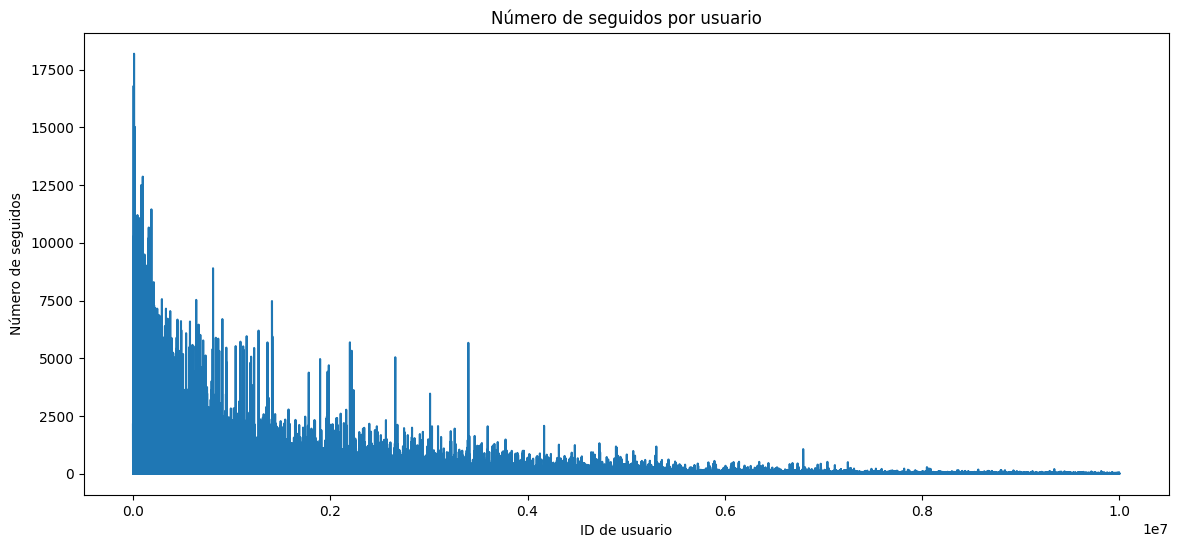

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=amigos_df, x=amigos_df.index + 1, y='n_amigos')
plt.title("Número de seguidos por usuario")
plt.xlabel("ID de usuario")
plt.ylabel("Número de seguidos")
plt.show()

## GRÁFICO NÚMERO DE SEGUIDORES

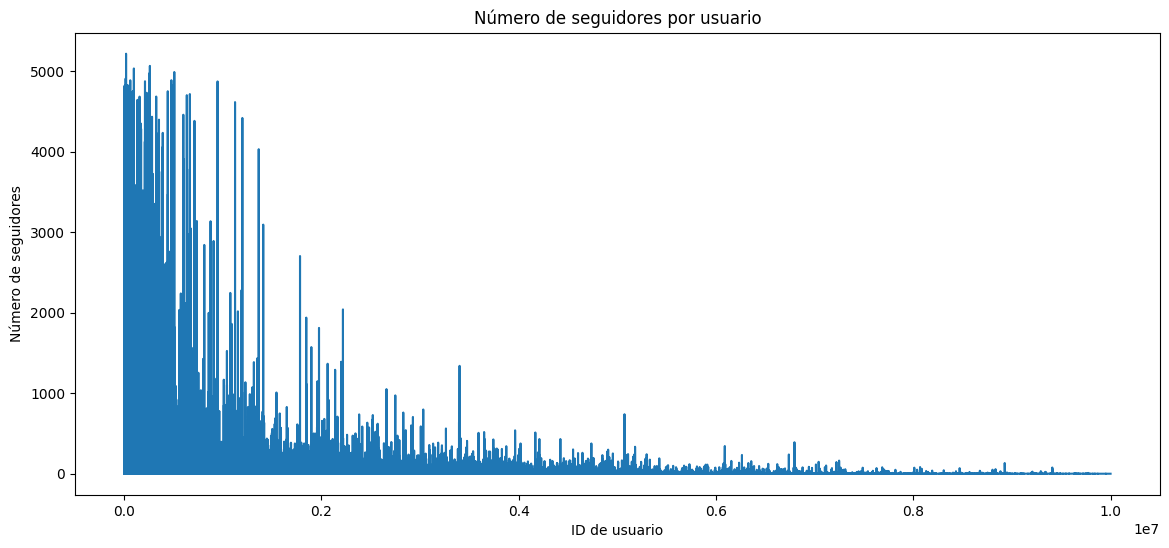

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=usuarios, x=usuarios.index + 1, y='n_seguidores')
plt.title("Número de seguidores por usuario")
plt.xlabel("ID de usuario")
plt.ylabel("Número de seguidores")
plt.show()

## HISTOGRAMA LATITUD

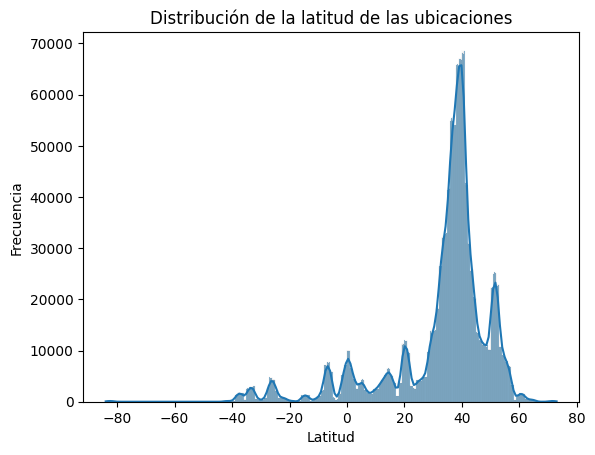

In [ ]:
sns.histplot(ubicaciones['lat'], kde=True)
plt.title("Distribución de la latitud de las ubicaciones")
plt.xlabel("Latitud")
plt.ylabel("Frecuencia")
plt.show()

## HISTOGRAMA LONGITUD

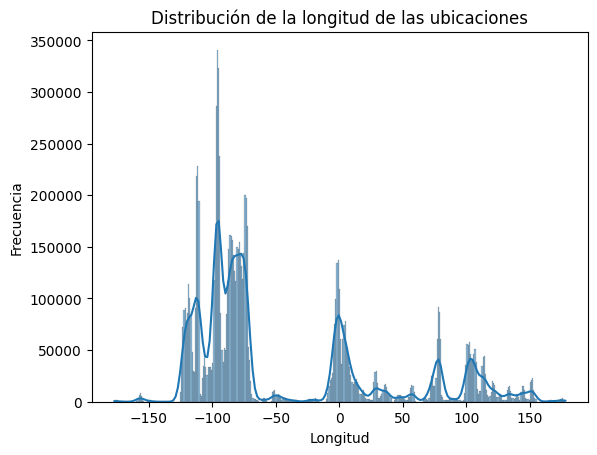

In [ ]:
sns.histplot(ubicaciones['long'], kde=True)
plt.title("Distribución de la longitud de las ubicaciones")
plt.xlabel("Longitud")
plt.ylabel("Frecuencia")
plt.show()

## GRÁFICO DE FRECUENCIA - UBICACIONES

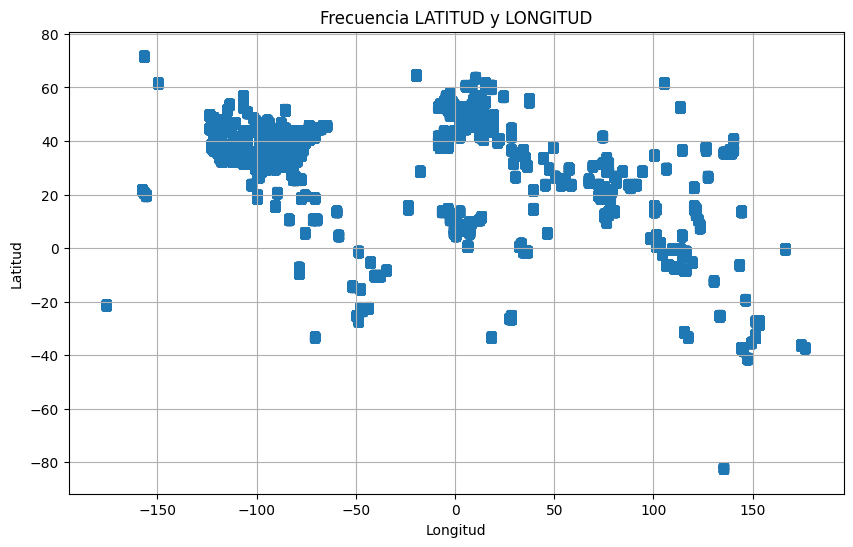

In [ ]:
counts = ubicaciones.groupby(['lat', 'long']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.scatter(counts['long'], counts['lat'], s=counts['count'] * 5, alpha=0.6)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Frecuencia LATITUD y LONGITUD')
plt.grid(True)
plt.show()

## GRÁFICO DE DENSIDAD - UBICACIONES

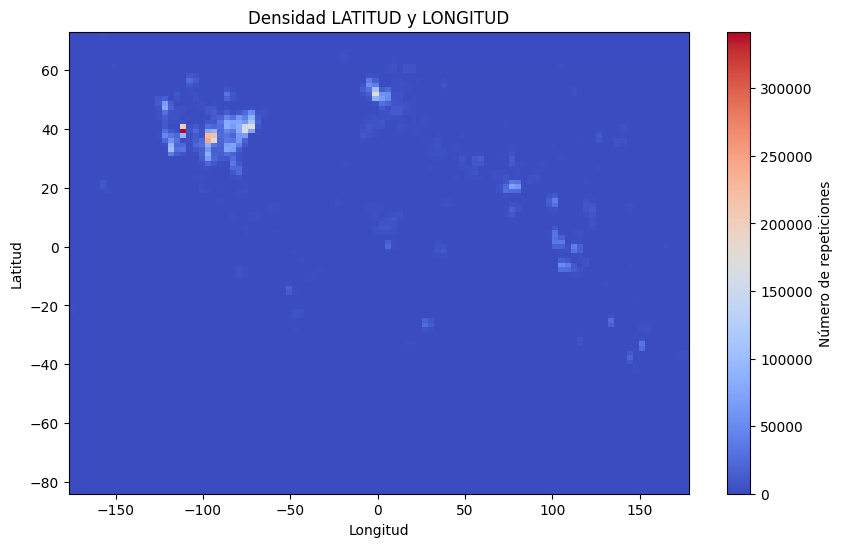

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(ubicaciones['long'], ubicaciones['lat'], bins=100, cmap='coolwarm')
plt.colorbar(label='Número de repeticiones')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Densidad LATITUD y LONGITUD')
plt.show()

## MAPA MUNDIAL

### **MAPA MUNDIAL** - allUSUARIOS

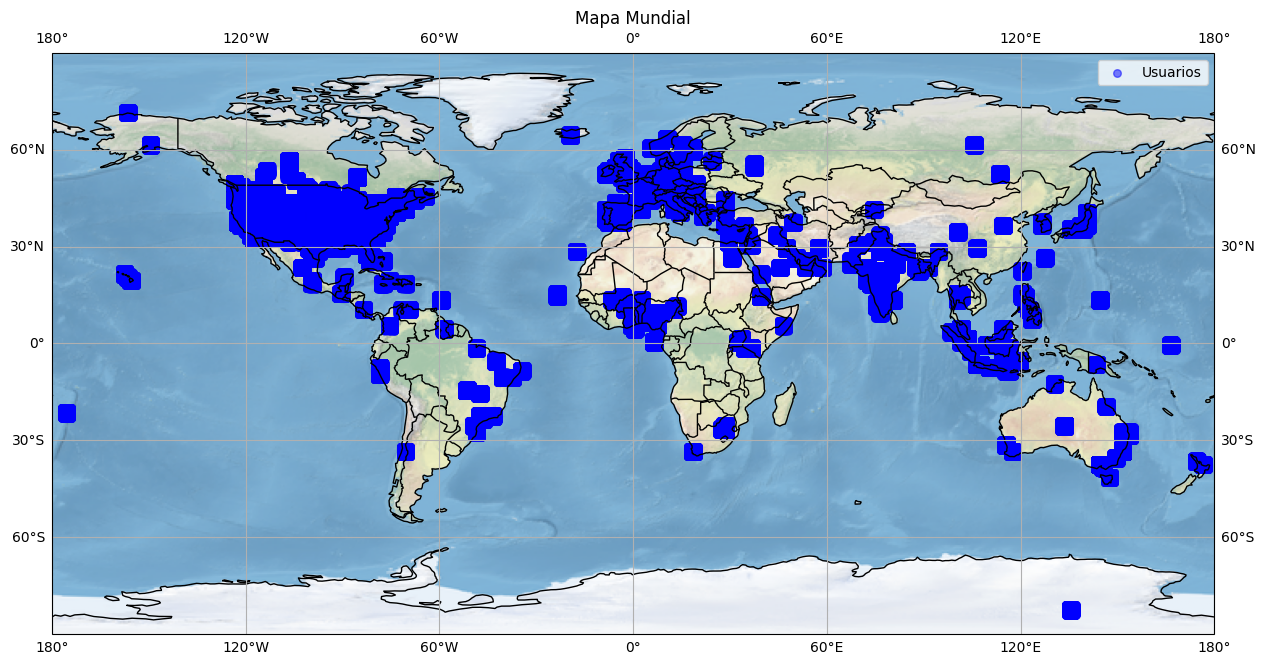

In [ ]:
graficar_mapa_mundial(ubicaciones["lat"], ubicaciones["long"])

### **MAPA MUNDIAL** - USUARIOS CON **MAS** SEGUIDORES

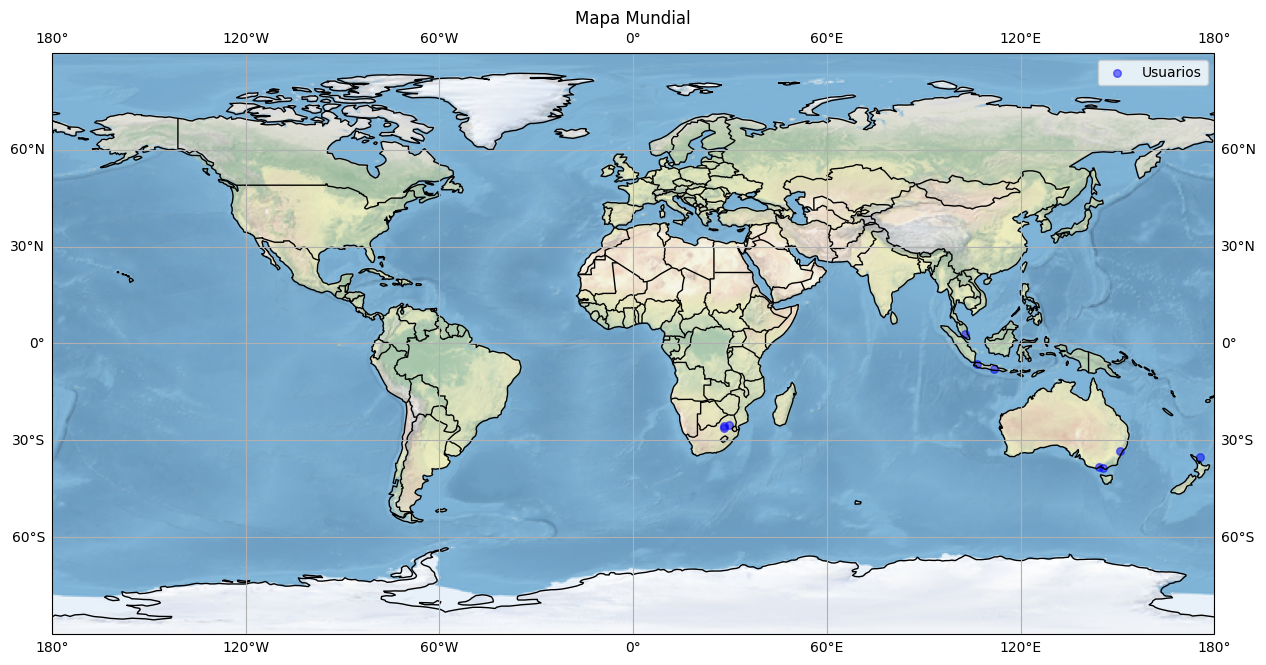

In [ ]:
graficar_mapa_mundial(usuarios_sr_maymen.head(V)["lat"], usuarios_sr_maymen.head(V)["long"])

### **MAPA MUNDIAL** - USUARIOS CON **MENOS** SEGUIDORES

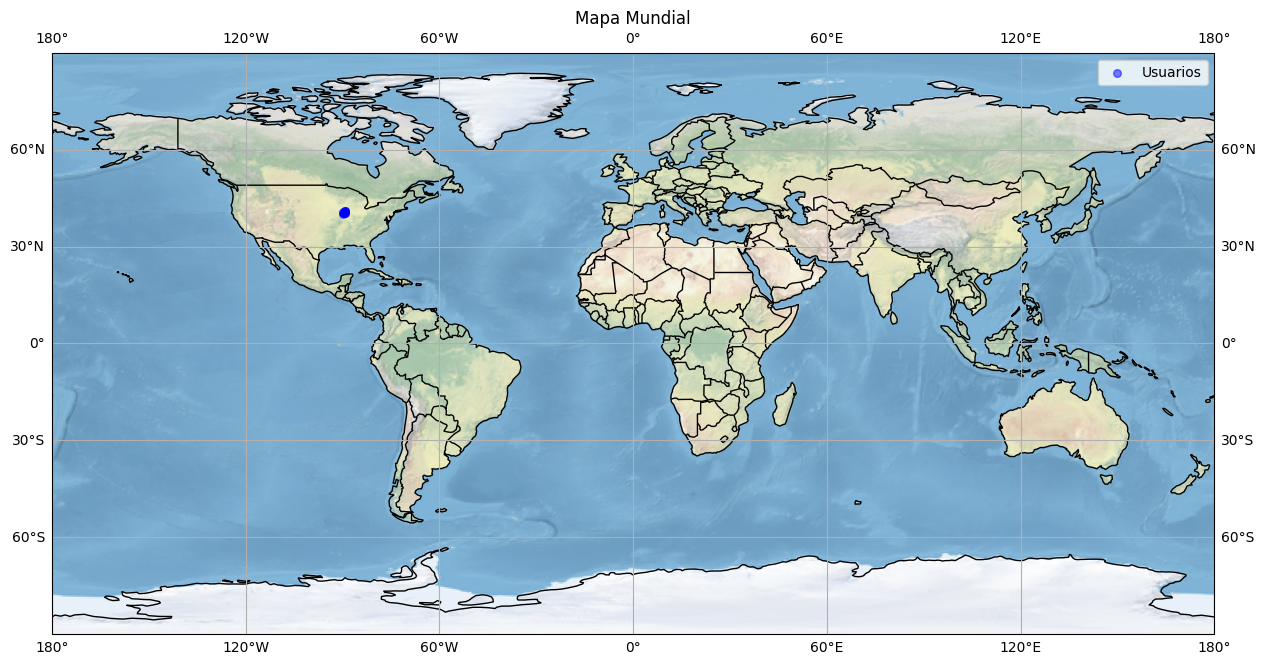

In [ ]:
graficar_mapa_mundial(usuarios_sr_menmay.head(V)["lat"], usuarios_sr_menmay.head(V)["long"])

### **MAPA MUNDIAL** - USUARIOS CON **MAS** SEGUIDOS

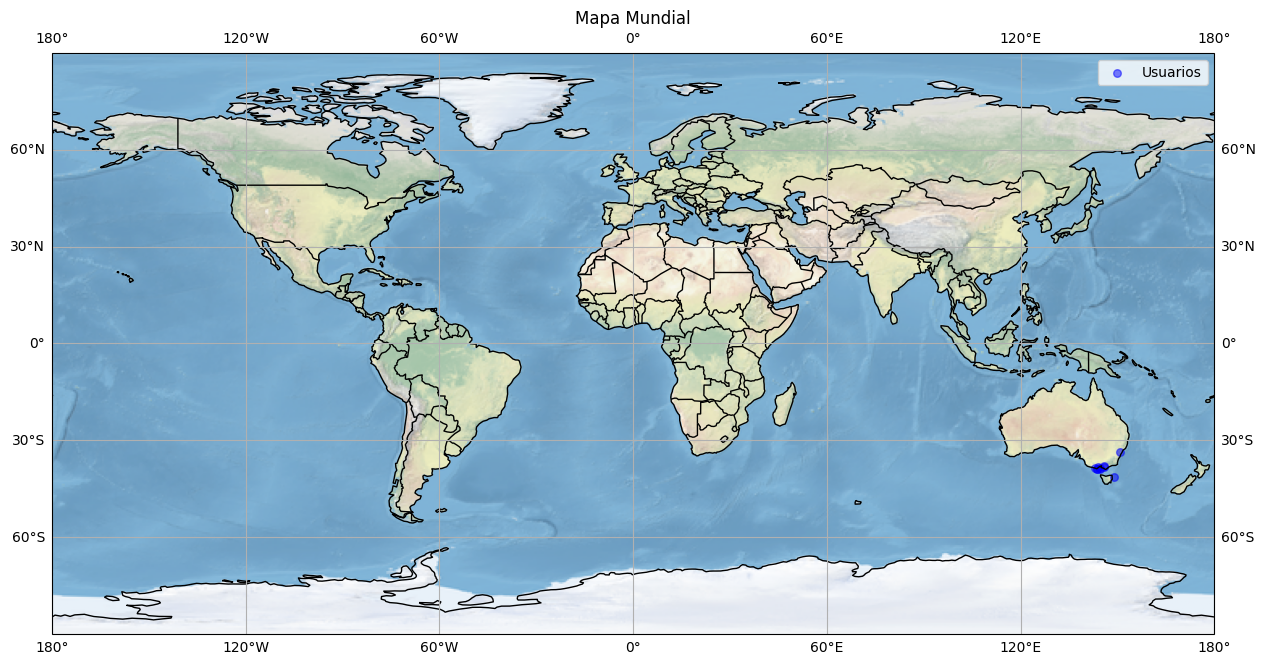

In [ ]:
graficar_mapa_mundial(usuarios_sd_maymen.head(V)["lat"], usuarios_sd_maymen.head(V)["long"])

### **MAPA MUNDIAL** - USUARIOS CON **MENOS** SEGUIDOS

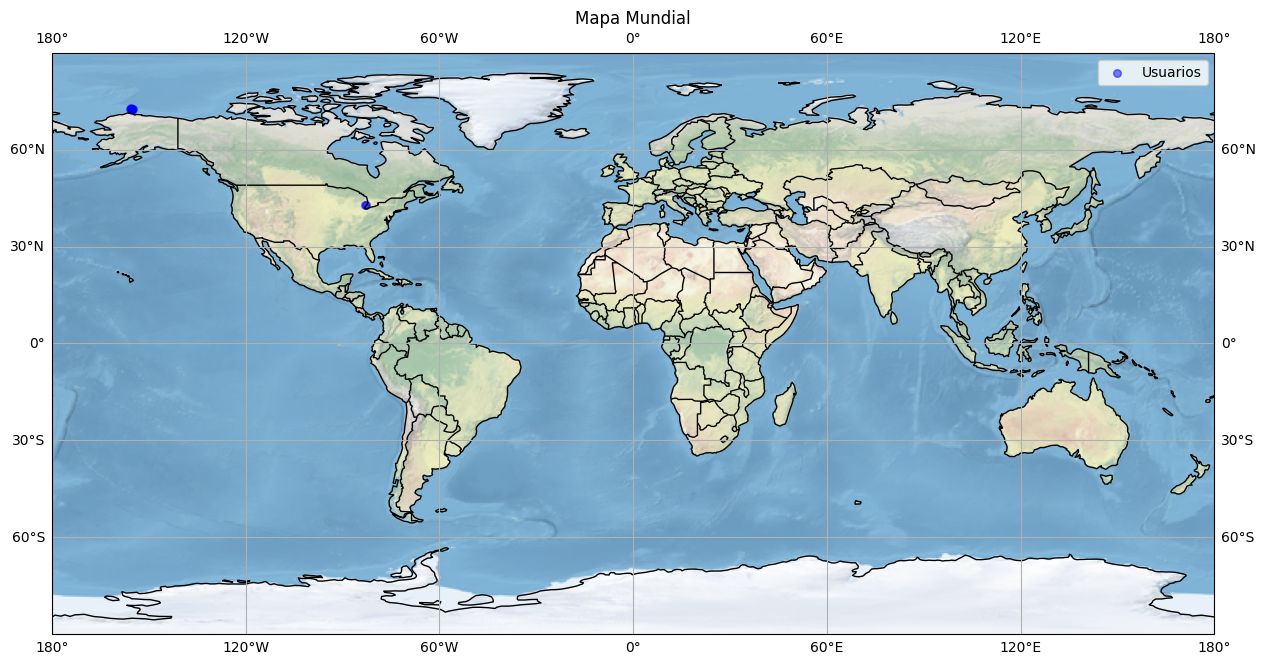

In [ ]:
graficar_mapa_mundial(usuarios_sd_menmay.head(V)["lat"], usuarios_sd_menmay.head(V)["long"])